<a href="https://colab.research.google.com/github/FAYASISMAEL/AI-ML-Visualization-Files/blob/main/DecisionTreeNaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree

dataset Reading

In [5]:
data = pd.read_csv('/content/heart_v2.csv')
data

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
...,...,...,...,...,...
265,52,1,172,199,0
266,44,1,120,263,0
267,56,0,140,294,0
268,57,1,140,192,0


Checking dataset

In [7]:
print('Dataset Shape: ', data.shape)
print('\nFirst 5 Rows:\n ', data.head()) # Not needed !!

Dataset Shape:  (270, 5)

First 5 Rows:
     age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0


Checking datatype

In [8]:
print('\nData Types:\n ', data.dtypes)


Data Types:
  age              int64
sex              int64
BP               int64
cholestrol       int64
heart disease    int64
dtype: object


Checking null values

In [9]:
print('\nNull Values:\n ', data.isnull().sum())


Null Values:
  age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64


Checking duplicate values

In [11]:
print('\nDuplicate Rows:\n ', data.duplicated().sum())


Duplicate Rows:
  0


In [12]:
data = data.drop_duplicates()

Checking Inconsistencies

In [14]:
print('\nStatistical Summary:\n ', data.describe())


Statistical Summary:
                age         sex          BP  cholestrol  heart disease
count  270.000000  270.000000  270.000000  270.000000     270.000000
mean    54.433333    0.677778  131.344444  249.659259       0.444444
std      9.109067    0.468195   17.861608   51.686237       0.497827
min     29.000000    0.000000   94.000000  126.000000       0.000000
25%     48.000000    0.000000  120.000000  213.000000       0.000000
50%     55.000000    1.000000  130.000000  245.000000       0.000000
75%     61.000000    1.000000  140.000000  280.000000       1.000000
max     77.000000    1.000000  200.000000  564.000000       1.000000


7. Encode Categorical Columns (if any)

In [16]:
le = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = le.fit_transform(data[col])

8. Split Features and Target

In [17]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [19]:
print('\nFeatures shape: ', X.shape)
print('Target shape: ', y.shape)


Features shape:  (270, 4)
Target shape:  (270,)


9. Feature Scaling

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

10. Train-Test Split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size = 0.2,
    random_state = 42
)

In [23]:
print("\nTrain-Test Split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Train-Test Split:
X_train: (216, 4)
X_test: (54, 4)
y_train: (216,)
y_test: (54,)


11. Naive Bayes Model

In [26]:
nb = GaussianNB()
nb.fit(X_train, y_train)

test_accuracy = nb.score(X_test, y_test)
print('\nNaive Bayes test Accuracy: ', test_accuracy)

train_accuracy = nb.score(X_train, y_train)
print('\nNaive Bayes train Accuracy: ', train_accuracy)


Naive Bayes test Accuracy:  0.7222222222222222

Naive Bayes train Accuracy:  0.6944444444444444


12. Decision Tree (For Visualization)

In [28]:
data = DecisionTreeClassifier(
    max_depth = 3,
    random_state = 42
)
data.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

13. Visualize Decision Tree

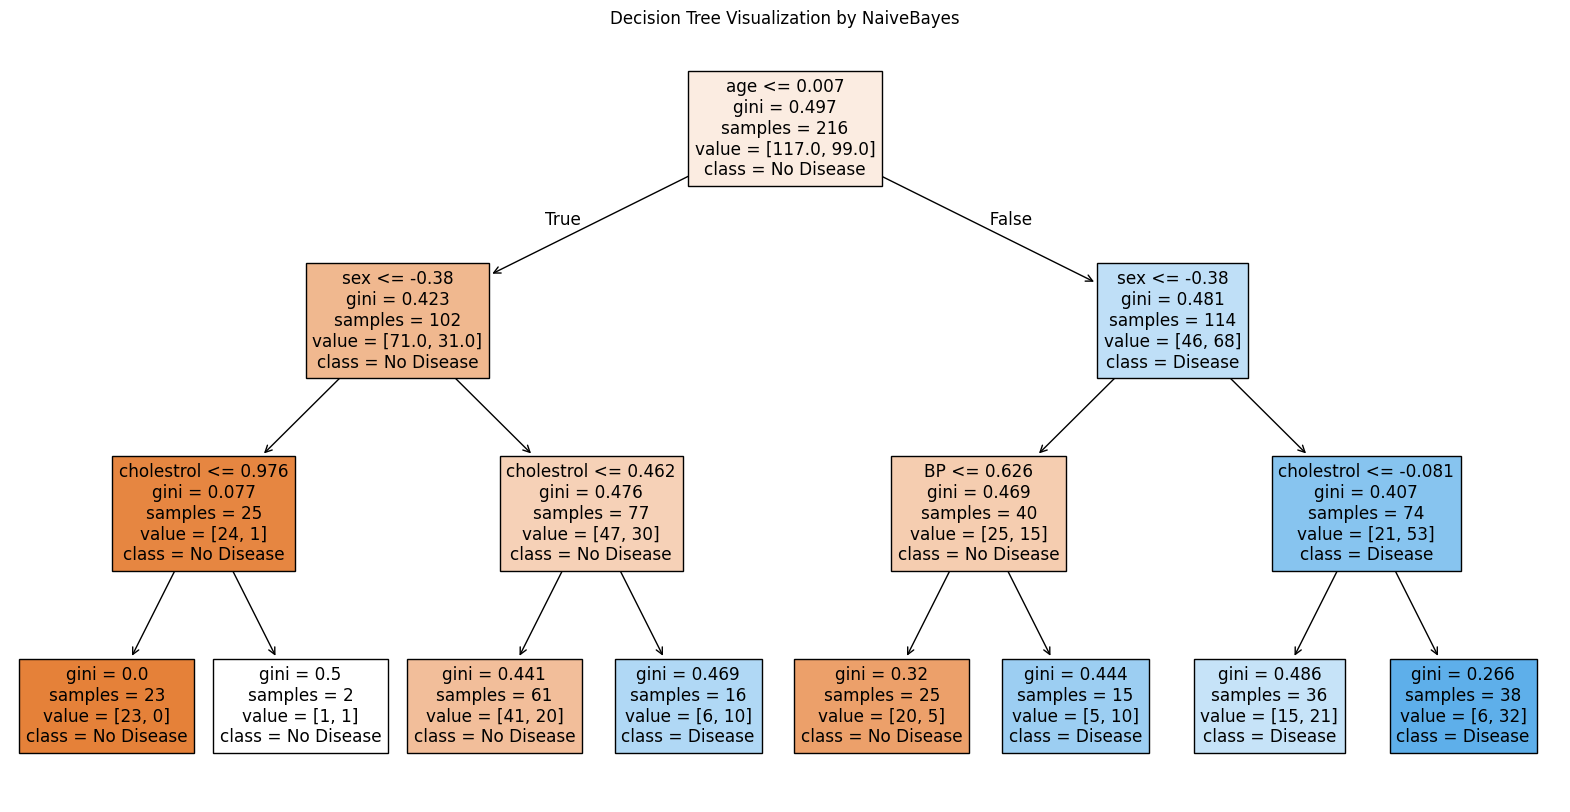

In [30]:
plt.figure(figsize=(20, 10))
plot_tree(
    data,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True
)
plt.title("Decision Tree Visualization by NaiveBayes")
plt.show()